# **Programming Assignment No. 3**

---


## *Logistic Regression*
### Members:
#####       Logroño, Jessie
#####       Pastores, Efren Jr.
#####       Rabe, Gary Clyde




In this assignment, you will train a model using **Logistic Regression**. Go to
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 and download the Wisconsin Breast Cancer dataset. The dataset contains **699 instances of breast tumors** with the following attributes:

1. Sample code number id number
2. Clump Thickness 1 - 10
3. Uniformity of Cell Size 1 – 10
4. Uniformity of Cell Shape 1 - 10
5. Marginal Adhesion 1 - 10
6. Single Epithelial Cell Size 1 - 10
7. Bare Nuclei 1 - 10
8. Bland Chromatin 1 - 10
9. Normal Nucleoli 1 - 10
10. Mitoses 1 - 10
11. Class: (2 for benign, 4 for malignant)

From the raw data set, ***remove rows with missing values***, ***remove the column “Sample code number” and replace the “Class” values into 0’s and 1’s*** ***(0 for benign, 1 for malignant)***. You may choose to do this in Python (Pandas) or manually in spreadsheet application. The goal is to make a classifier for the tumor status

##**Import Necessary Libraries**


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Dataset**

##**Load the Data**

In [53]:

# URL of the dataset
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
#Breast Cancer Wisconsin (Original) https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

# Define the column names for the dataset
COLUMN_NAMES = [
    "Sample_code_number",         # ID number of the sample
    "Clump_Thickness",            # Thickness of the cell clumps
    "Uniformity_of_Cell_Size",    # Uniformity of cell size
    "Uniformity_of_Cell_Shape",   # Uniformity of cell shape
    "Marginal_Adhesion",          # Adhesion between cells
    "Single_Epithelial_Cell_Size",# Size of individual epithelial cells
    "Bare_Nuclei",                # Nuclei without cytoplasm
    "Bland_Chromatin",            # Chromatin texture
    "Normal_Nucleoli",            # Appearance of nucleoli
    "Mitoses",                    # Rate of mitosis
    "Class"                       # Class label (2 for benign, 4 for malignant)
]

# Load the dataset directly from the URL
data = pd.read_csv(DATASET_URL, header=None, names=COLUMN_NAMES)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

Dataset Preview:


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## **Preprocessing the Data**

### **Remove Rows with Missing Values**

In [54]:
# Replace '?' with NaN
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Calculate the number of rows before and after cleaning
total_rows_before = 699  # Total rows in the original dataset
total_rows_after = len(data)  # Total rows after dropping missing values
removed_rows = total_rows_before - total_rows_after  # Calculate removed rows

# Display the results
print(f"Total rows before cleaning: {total_rows_before}")
print(f"Total rows after cleaning: {total_rows_after}")
print(f"Number of removed rows: {removed_rows}")

Total rows before cleaning: 699
Total rows after cleaning: 683
Number of removed rows: 16


### **Remove the Sample Code Number Column**

In [55]:
# Drop the 'Sample_code_number' column as it's not needed for analysis
data.drop(columns=['Sample_code_number'], inplace=True)

# Display the first few rows of the updated dataset
print("Updated Dataset Preview (after dropping 'Sample_code_number'):")
display(data.head())

Updated Dataset Preview (after dropping 'Sample_code_number'):


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


### **Replace Class Values**

In [56]:
# Replace 'Class' values: 2 (benign) -> 0 and 4 (malignant) -> 1
data['Class'] = data['Class'].map({2: 0, 4: 1})

# Display the updated dataset
print("Updated Dataset Preview (with 'Class' values replaced):")
display(data.head())

# Display the count of each class
print("\nCount of Each Class:")
class_counts = data['Class'].value_counts()
print(class_counts)

# Optional: Display counts with class names
print("\nClass Counts with Labels:")
class_labels = {0: "Benign", 1: "Malignant"}
for class_value, count in class_counts.items():
    print(f"{class_labels[class_value]}: {count}")

Updated Dataset Preview (with 'Class' values replaced):


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0



Count of Each Class:
Class
0    444
1    239
Name: count, dtype: int64

Class Counts with Labels:
Benign: 444
Malignant: 239


###**Features and Target**

In [57]:
# Separate Features (X) and Target (y)
X = data.drop(columns=['Class'])  # Features: all columns except 'Class'
y = data['Class']                 # Target: 'Class' column (0 = benign, 1 = malignant)

# Display the Features and Target
print("Features (X):")
display(X.head())  # Show the first few rows of the feature set

print("\nTarget (y):")
display(y.head())  # Show the first few rows of the target set

Features (X):


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1



Target (y):


,Class
0,0
1,0
2,0
3,0
4,0


#**General Guidelines**

####**1. Split the samples into 70% Training and 30% Testing at random.**
####**2. Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and Logistic regression.**
####**3. Use the default penalty settings of Logistic Regression.**



In [58]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Display the class distribution in both the training and testing sets
print("Class distribution in the training set:")
print(y_train.value_counts())  # Count the occurrences of each class in the training set

print("\nClass distribution in the testing set:")
print(y_test.value_counts())  # Count the occurrences of each class in the testing set

Class distribution in the training set:
Class
0    311
1    167
Name: count, dtype: int64

Class distribution in the testing set:
Class
0    133
1     72
Name: count, dtype: int64


In [59]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

####**4. After fitting the data, what is the model’s training and testing accuracy? Which features are most important?**

In [60]:
# Calculate the accuracy of the model on both training and testing datasets
train_accuracy = pipeline.score(X_train, y_train)  # Accuracy on the training set
test_accuracy = pipeline.score(X_test, y_test)      # Accuracy on the testing set

# Display the accuracy results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")  # Display in percentage format
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")    # Display in percentage format

Training Accuracy: 97.70%
Testing Accuracy: 96.10%


In [61]:
# Get feature importance from the logistic regression model in the pipeline
feature_importance = pipeline.named_steps['logistic'].coef_[0]

# Create a DataFrame to map feature names to their corresponding importance values
importance_df = pd.DataFrame({
    'Feature': X.columns,              # Feature names
    'Importance': feature_importance   # Corresponding importance values
}).sort_values(by='Importance', ascending=False)  # Sort by importance in descending order

# Display the feature importance
print("Feature Importance (sorted):\n")
print(importance_df)

Feature Importance (sorted):

                       Feature  Importance
5                  Bare_Nuclei    1.849199
0              Clump_Thickness    1.198459
8                      Mitoses    0.889682
2     Uniformity_of_Cell_Shape    0.877177
1      Uniformity_of_Cell_Size    0.736751
3            Marginal_Adhesion    0.676237
7              Normal_Nucleoli    0.494755
6              Bland_Chromatin    0.440015
4  Single_Epithelial_Cell_Size    0.382828


####**5. Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate.**

Confusion Matrix:



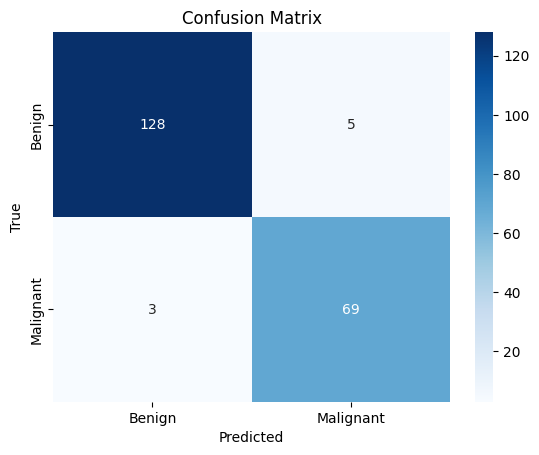

In [62]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n")

# Visualizing the confusion matrix using a heatmap for better understanding
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [63]:
# Generate the classification report
classification_report_text = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

# Display the classification report
print("Classification Report:\n")
print(classification_report_text)

Classification Report:

              precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       133
   Malignant       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [64]:
# Calculate False Alarm Rate (FAR)
# FAR = False Positives / (False Positives + True Negatives)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])

# Display the False Alarm Rate
print(f"False Alarm Rate (FAR): {false_positive_rate:.4f}")

False Alarm Rate (FAR): 0.0376


####**6. Plot the ROC curve and report the AUC. For this item, make a result for both the training and testing data, separately.**

In [65]:
# Obtain predicted probabilities for the positive class (1) for both training and testing sets
y_train_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilities for the training set
y_test_proba = pipeline.predict_proba(X_test)[:, 1]   # Probabilities for the testing set

<ipython-input-66-43bb718b6ebd>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray", linewidth=1.5)


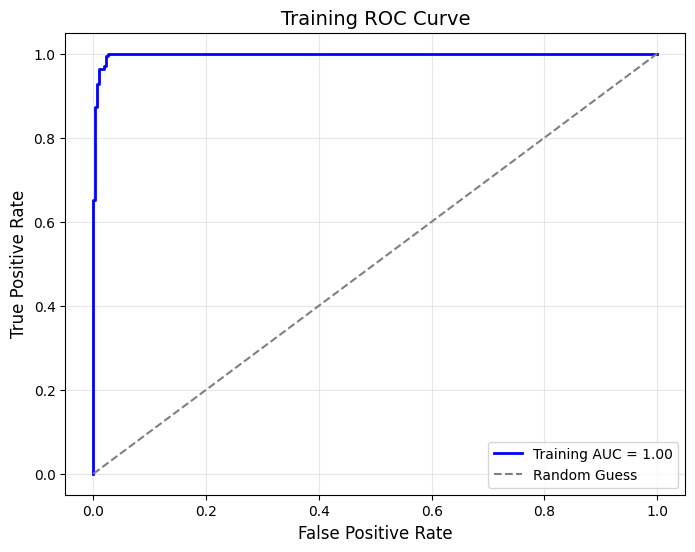

In [66]:
# Compute ROC curve and AUC for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_proba)
train_auc = roc_auc_score(y_train, y_train_proba)

# Plot the ROC curve for the training set
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Training AUC = {train_auc:.2f}", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray", linewidth=1.5)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Training ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)  # Add a light grid for better readability
plt.show()

<ipython-input-67-4550571283df>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray", linewidth=1.5)


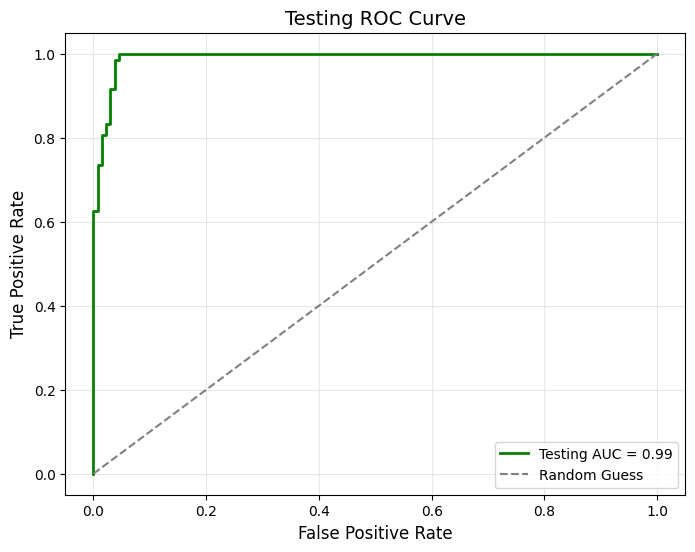

In [67]:
# Compute ROC curve and AUC for the testing set
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba)
test_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve for the testing set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, label=f"Testing AUC = {test_auc:.2f}", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray", linewidth=1.5)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Testing ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)  # Add a light grid for better readability
plt.show()

#**GUIDED QUESTIONS**:
You are expected to answer the following questions using your analysis:


---



####**1. What steps are required to remove the "Sample code number" column?**

To remove the "Sample code number" column from the dataset, we used the drop() method in pandas. This method allows us to specify the column to be removed by its name. We included the parameter inplace=True so the changes are directly applied to the original DataFrame, without needing to reassign it to a new variable. Here's the code that we used:


```
data.drop(columns=['Sample_code_number'], inplace=True)
```
This ensures that the "Sample code number" column is completely removed from the dataset and no longer appears in the DataFrame.


---



####**2. How can the "Class" values be converted into binary (0 and 1) form in Python**

To convert the "Class" values into binary form (0 and 1) in Python, we used the map() function in pandas. This function replaces the existing values in the "Class" column with new values based on a mapping dictionary. In the dataset, the original "Class" values were 2 (benign) and 4 (malignant). We mapped 2 to 0 and 4 to 1, effectively converting the "Class" column into a binary format. Here's the code that we used:


```
data['Class'] = data['Class'].map({2: 0, 4: 1})
```
This approach ensures that the column is properly updated, with 0 representing benign cases and 1 representing malignant cases.


---



####**3. What is the importance of splitting the dataset into training and testing sets?**


Splitting the dataset into training and testing sets is crucial for evaluating a model's performance. The training set helps the model learn patterns, while the testing set evaluates how well the model generalizes to unseen data. This prevents overfitting, ensures the model isn’t memorizing data, and allows for fair comparison between different models. In our case, using train_test_split() splits the data into 70% training and 30% testing, while maintaining class distribution in both sets. Here's the code that we used:


```
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
```


---




####**4. Why is it necessary to use the stratify parameter in the train_test_split function?**


The stratify parameter in train_test_split() ensures that the class distribution in both the training and testing sets is similar to the original dataset. This is especially important in imbalanced datasets, as it prevents biased model performance and ensures the model learns from a balanced representation of classes. In our case, using stratify=y keeps the proportion of benign and malignant cases consistent in both sets. Refer to the code given in the previous number.


---



####**5. What is logistic regression, and why is it suitable for this dataset?**

It is a binary classification model that predicts the probability of an instance belonging to one of two classes. It is suitable for this dataset because the target variable ("Class") is binary (benign or malignant), and logistic regression assumes a linear relationship between the features and the target. It also provides interpretable coefficients, which is helpful in medical applications for understanding the impact of features like cell size or clump thickness on tumor classification.


---



####**6. How can the training and testing accuracy of the logistic regression model be calculated?**

The training and testing accuracy of the logistic regression model can be calculated using the score() method of the pipeline, which returns the accuracy of the model on the given data.  In the code, we used:


```
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
```

This method directly provides the accuracy for both the training and testing sets, giving us an idea of how well the model performs on known data (training) and unseen data (testing).


---



####**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**

Based on the results obtained in General Guidelines No. 4, the feature importance values are as follows (sorted in descending order of importance):
```
Feature Importance (sorted):

                       Feature  Importance
5                  Bare_Nuclei    1.849199
0              Clump_Thickness    1.198459
8                      Mitoses    0.889682
2     Uniformity_of_Cell_Shape    0.877177
1      Uniformity_of_Cell_Size    0.736751
3            Marginal_Adhesion    0.676237
7              Normal_Nucleoli    0.494755
6              Bland_Chromatin    0.440015
4  Single_Epithelial_Cell_Size    0.382828

```
The most influential features in determining tumor status are **Bare Nuclei, Clump Thickness, and Mitoses**. These features have the highest importance scores, meaning they contribute most to the model's prediction of whether a tumor is malignant or benign.

Feature importance can be assessed by looking at the coefficients of the trained logistic regression model. In this case, the coefficients represent how much each feature affects the probability of the tumor being malignant. Higher values indicate that the feature has a greater impact on the prediction. Here's the code that we used to determine the feature importance values:


```
# Get feature importance
feature_importance = pipeline.named_steps['logistic'].coef_[0]

# Map feature names to importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

```


---



####**8. How is a confusion matrix generated, and what does it represent?**

It is generated by comparing the predicted labels (from the model) with the actual labels (from the test data). It shows how many instances were correctly and incorrectly classified across different categories (e.g., benign and malignant). The matrix provides a detailed breakdown of model performance by displaying four key values:

* True Positives (TP): The number of malignant tumors correctly classified as malignant.
* True Negatives (TN): The number of benign tumors correctly classified as benign.
* False Positives (FP): The number of benign tumors incorrectly classified as malignant (False Alarm).
* False Negatives (FN): The number of malignant tumors incorrectly classified as benign.

The confusion matrix helps in evaluating the performance of the classification model by showing how well the model is distinguishing between the classes.

We used the following codes to generate and visualize the confusion matrix:


```
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:\n")

# Visualizing the confusion matrix using a heatmap for better understanding
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
```
---

####**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

Precision, recall, F1-score, and false alarm rate are important metrics used to evaluate the performance of a classification model. They can all be derived from the values in the confusion matrix (True Positives(TP), True Negatives(TN), False Positives(FP), and False Negatives(FN)).

We can calculate these metrics using the following formulas:

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$

F1-Score = $2 \frac{(Precision)(Recall)}{Precision+Recall}$

False Alarm Rate = $\frac{TP}{TP+FP}$

We used the classification_report() function to calculate for the Precision, Recall, and F1-score for both Class(Benign and Malignant). Here's the code:
```
# Generate the classification report
classification_report_text = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

```


We used the following code to calculate for the False Alarm Rate:
```
# # Calculate False Alarm Rate (FAR)
# FAR = False Positives / (False Positives + True Negatives)
false_positive_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
```

---


####**10. Why are these metrics important for evaluating the performance of a classifier?**

Below are the importance of the following metrics for evaluating the performance of a classifier:
* **Precision** helps assess how many of the predicted positives are actually correct, which is crucial when false positives (e.g., benign tumors misclassified as malignant) are costly or harmful.
* **Recall** measures how many actual positive cases the model successfully identifies, which is important when false negatives (e.g., malignant tumors misclassified as benign) are critical to catch.
* **F1-Score** combines precision and recall into a single metric, providing a balanced evaluation when there is a need to optimize both. It is particularly useful in imbalanced datasets where accuracy alone can be misleading.
* **False Alarm Rate** measures how often benign cases are incorrectly classified as malignant. Minimizing this rate is important in applications like healthcare, where false alarms can lead to unnecessary procedures and costs.

These metrics offer a comprehensive evaluation, ensuring that the classifier performs well across different error types and meets the specific needs of the application. They are especially valuable when dealing with imbalanced datasets, where accuracy might not reflect the true performance of the model.

---

####**11. What is an ROC curve, and how is it plotted for a logistic regression model?**

It visualizes the performance of a classifier by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) across different thresholds. It helps assess how well the classifier distinguishes between the two classes at various decision thresholds.

* True Positive Rate (TPR), or Recall, measures how many actual positives the model correctly identifies.
* False Positive Rate (FPR) measures how many actual negatives are incorrectly classified as positives.

It is plotted using the predicted probabilities for the positive class (e.g., malignant tumors).

The following codes are used to plot the Training ROC:

1. Predict Possibilities

```
# Obtain predicted probabilities for the positive class (1) for both training and testing sets
y_train_proba = pipeline.predict_proba(X_train)[:, 1]  # Probabilities for the training set
y_test_proba = pipeline.predict_proba(X_test)[:, 1]   # Probabilities for the testing set
```

2. Calculate FPR and TPR

```
# Compute ROC curve and AUC for the training set
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_proba)
train_auc = roc_auc_score(y_train, y_train_proba)
```

3. Plot the ROC curve

```
# Plot the ROC curve for the training set
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Training AUC = {train_auc:.2f}", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="gray", linewidth=1.5)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Training ROC Curve", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)  # Add a light grid for better readability
plt.show()
```

**Note:** The codes are the same for plotting the Testing ROC, just change train/training with test/testing.

---

####**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**

It is calculated by finding the area under the ROC (Receiver Operating Characteristic) curve. This involves integrating the area under the curve plotted between the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis.

We used the roc_auc_score () function to calculate the AUC for both Training and Testing data.

Its significance are as follows:
* **AUC = 0.5**: The model has no discriminatory ability, meaning it performs no better than random guessing. In this case, the ROC curve would lie along the diagonal, representing equal performance for both positive and negative classes.

* **AUC > 0.5 and < 1.0**: The model has some discriminatory ability, with higher AUC values indicating better performance. A higher AUC means that the model is better at distinguishing between the positive and negative classes across all possible thresholds.

* **AUC = 1.0**: The model has perfect discriminatory ability, meaning it can correctly classify all positive and negative cases.

####**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**

**Training ROC Curve:** This curve reflects the model's performance on the data it was trained with. A good ROC curve for training indicates that the model is learning the patterns in the data effectively.

**Testing ROC Curve:** This curve shows the model’s performance on unseen data, i.e., how well it generalizes. A good testing ROC curve means the model can correctly classify new instances and is not just memorizing the training data.

The insights derived from the comparison of the ROC curves are as follows:
* **Model Generalization**: If the training and testing ROC curves are close, it indicates good generalization, meaning the model will likely perform well in real-world situations.
* **Overfitting or Underfitting**: Significant differences between the training and testing curves suggest potential overfitting or underfitting, which can be addressed by adjusting the model’s complexity, using regularization, or improving the data quality.
* **Model Improvements**: If the model is performing poorly on the testing data, looking at the ROC curve comparison can guide us to try different approaches (e.g., more data, different features, or advanced models) to improve generalization.

####**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**

The challenges that we encountered are the following:
1. **Dataset:** The given link directed us to Breast Cancer Wisconsin (Diagnostic) dataset which contains 569 instances and 30 features which is different from the supposed no. of instances (699) and attributes (11) mentioned at the start of this programming assignment.
  * **Solution:** Using the search bar in the website, we searched for Breast
  Cancer Wisconsin as shown in the image below and found out that there are 3 different datasets (Original, Diagnostic, and Prognostic). Afterwards, we carefully opened each of the dataset and discovered that the dataset that we should use is the **Breast Cancer Wisconsin (Original)** from the same website.

2. **Missing Data:** The dataset have missing values, particularly in the 'Bare_Nuclei' column, represented as '?'.
  * **Solution:** We addressed this by converting '?' values to NaN and then used *pd.to_numeric()* to coerce non-numeric values into NaN. After that, we dropped rows with missing values using *dropna()*, ensuring that the model only trained on complete data.

3. **Class Categorical Values:** The 'Class' column contained categorical values (2 for benign, 4 for malignant).
  * **Solution:** We used the *map()* function to replace the values 2 with 0 and 4 with 1, converting the 'Class' column into binary labels suitable for logistic regression.

4. **Feature Scaling:** Logistic regression is sensitive to the scale of features, and the dataset contains features with varying scales (e.g., 'Clump_Thickness' and 'Bare_Nuclei').
  * **Solution:** We applied *StandardScaler* within a pipeline to standardize the features, ensuring that each feature has a mean of 0 and a standard deviation of 1. This helped improve model performance and convergence speed.

5. **Class Imbalance:** There is a class imbalance between benign (0) and malignant (1) tumors, leading to a biased model if not addressed.
  * **Solution:** We used *stratify=y* to ensure that the ratio of benign (0) and malignant (1) in both the training and testing sets is the same as in the original dataset.

6. **Overfitting/Underfitting:** The model can be too focused on the majority class (benign with 444 instances).
  * **Solution:** We used a *pipeline* to standardize data and apply logistic regression, which helps prevent data leakage and ensures proper model training.

####**15. If the model's performance is not satisfactory, what adjustments could be made to improve it**

Aside from the adjustments we did in this programming assignment, the other  adjustments that we could think of to improve the model's performance are the following:
  * Balance the dataset as one class has much more instances than the other.
  * Removal of irrelevant features

